In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [14]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Siesi\OneDrive\Education\Port Folio\Data Sets\WA_Fn-UseC_-HR-Employee-Attrition_.csv")

# Display the first few rows of the dataset
print(data.head())

# Display the summary information about the dataset
print(data.info())


# Display the data types of each column
print(data.dtypes)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [27]:
# Data Cleaning 
# check for missing values
print(data.isnull().sum())

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Display the number of duplicate rows after handling them
print(f'Number of duplicate rows: {data_cleaned.duplicated().sum()}')

# Display unique values in categorical columns to check for inconsistencies
for column in categorical_columns:
    print(f'Unique values in {column}: {data_cleaned[column].unique()}')

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

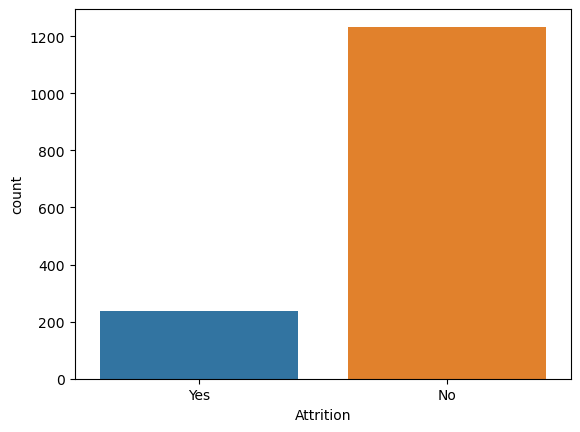

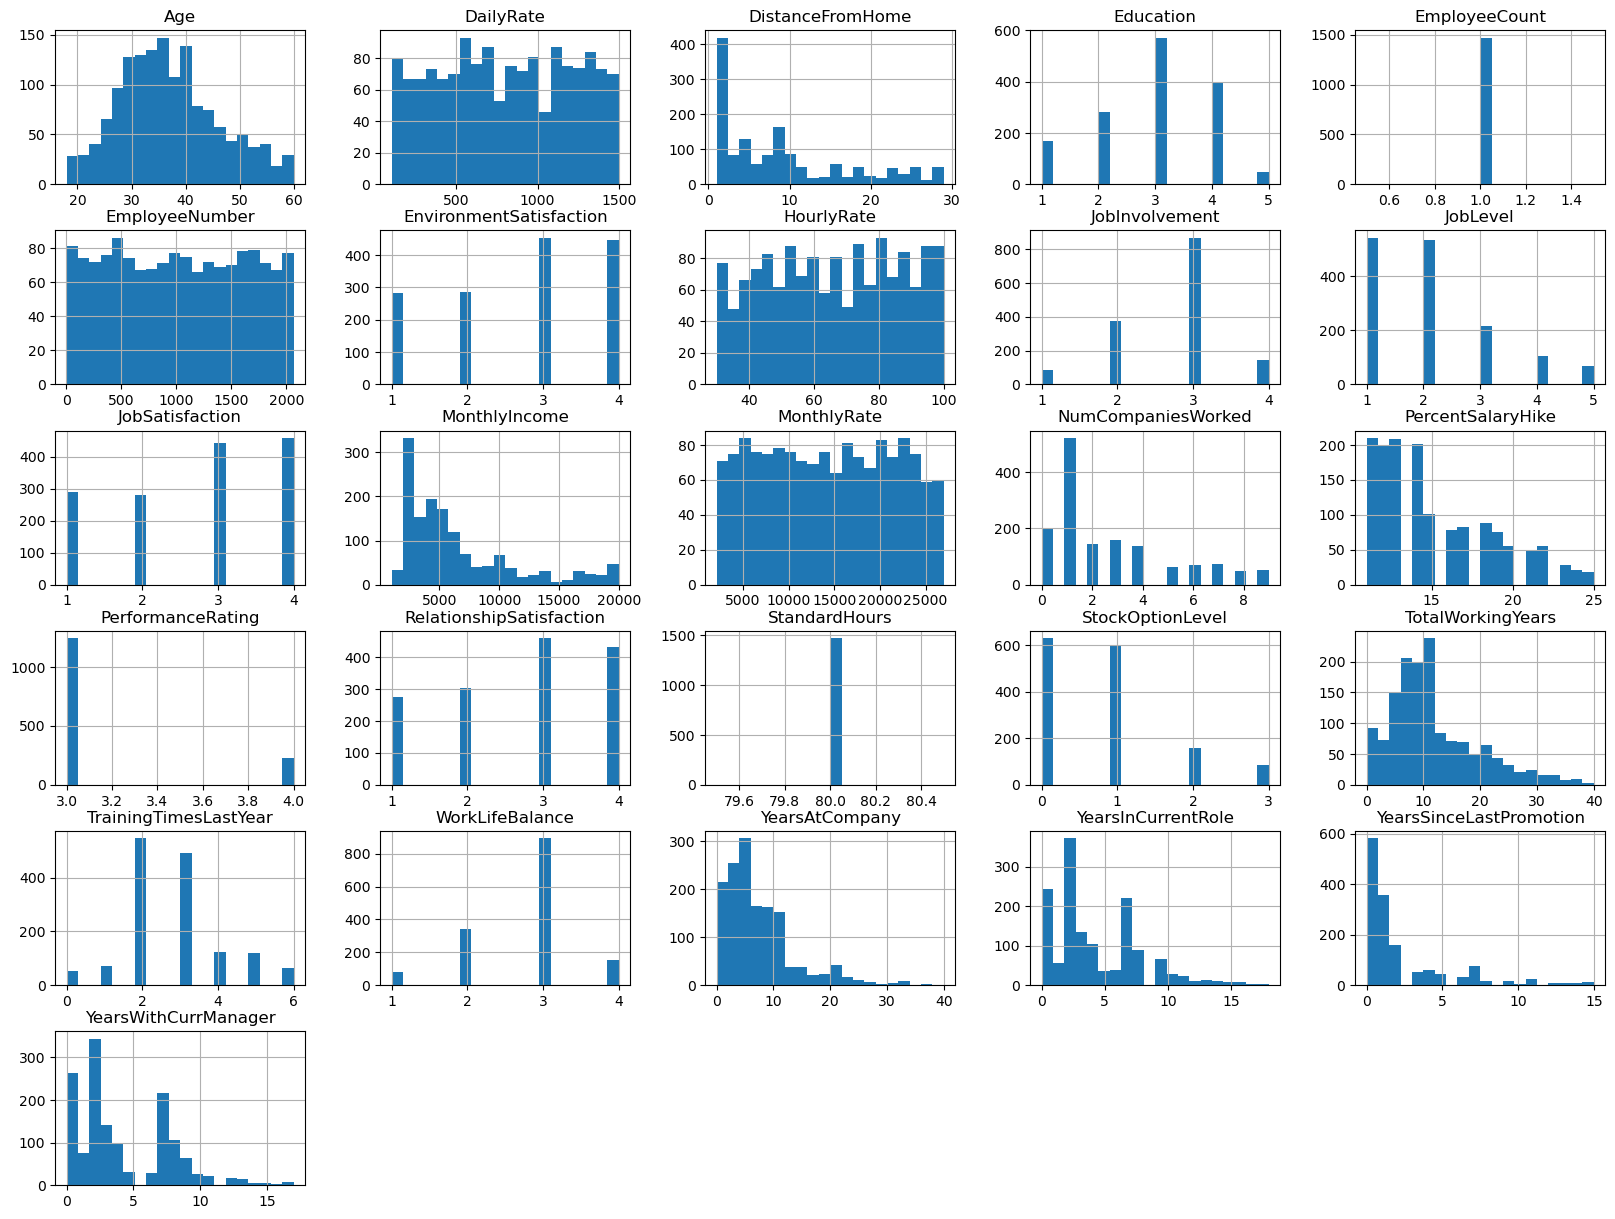

C:\Users\Siesi\AppData\Local\Temp\ipykernel_11564\276525045.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


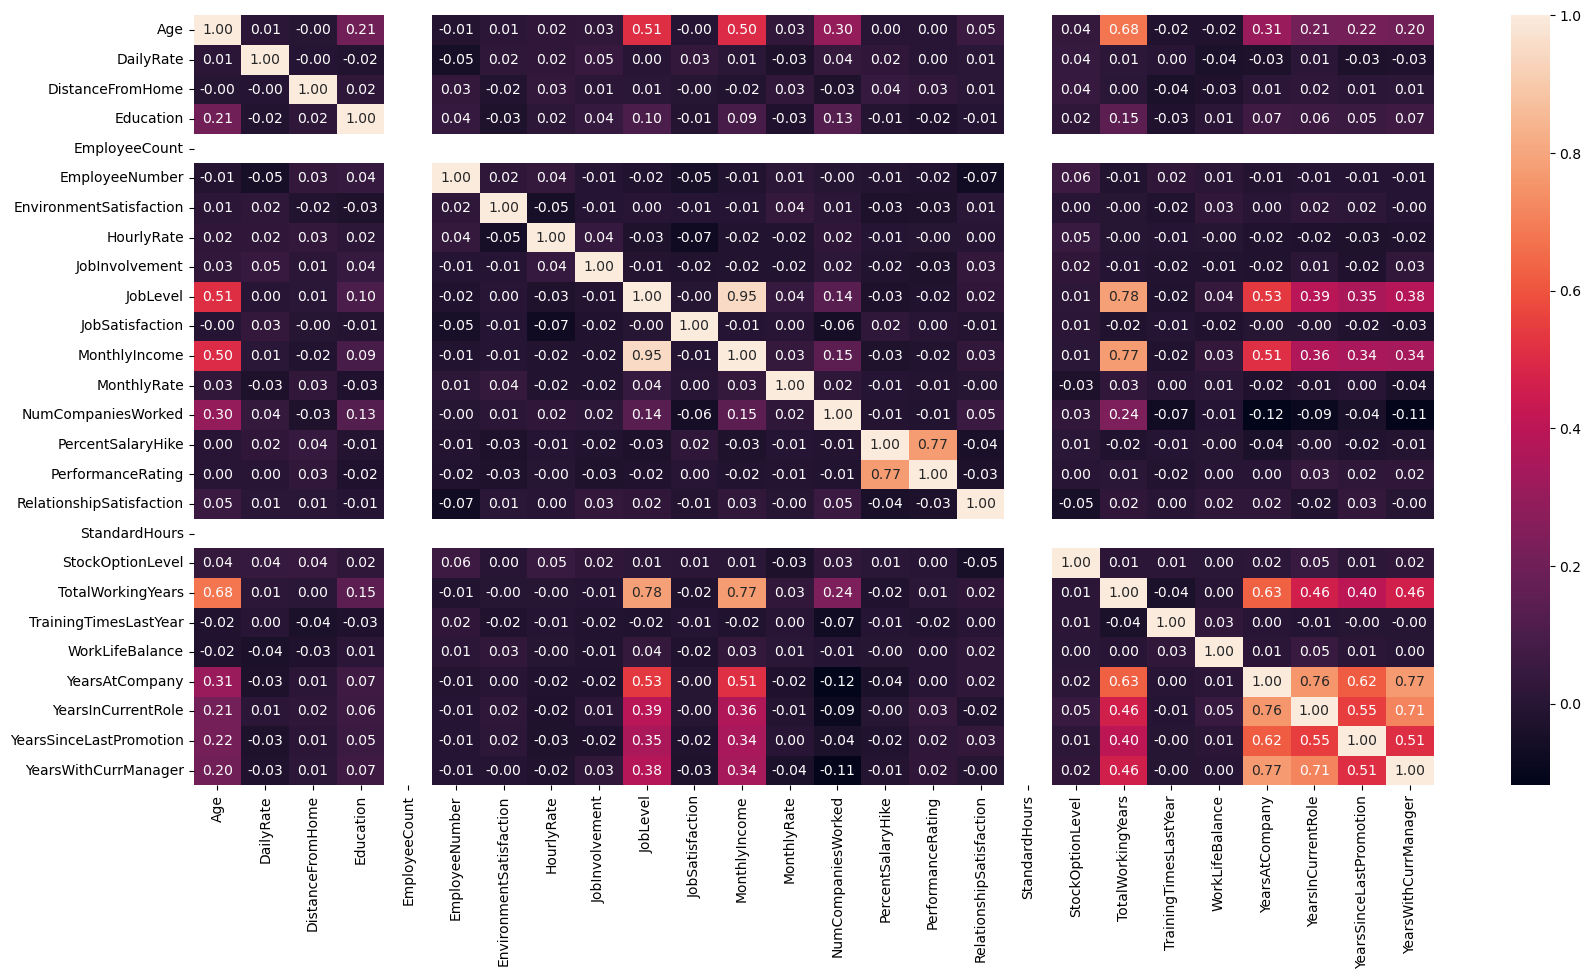

In [28]:
# Exploratory Data Analysis

# Get a summary of the dataset
print(data.describe())

# Visualize the distribution of attrition
sns.countplot(x='Attrition', data=data)
plt.show()

# Visualize the distribution of numerical features
data.hist(bins=20, figsize=(20, 15))
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [37]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
    
# Scale numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Verify scaling
print("First few rows of scaled numerical features:")
print(data[numerical_features].head())



# Separate the features and the target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Verify feature-target separation
print("First few rows of feature set X:")
print(X.head())
print("First few values of target variable y:")
print(y.head())



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify data splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

First few rows of scaled numerical features:
        Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350   0.742527         -1.010909  -0.891688            0.0   
1  1.322365  -1.297775         -0.147150  -1.868426            0.0   
2  0.008343   1.414363         -0.887515  -0.891688            0.0   
3 -0.429664   1.461466         -0.764121   1.061787            0.0   
4 -1.086676  -0.524295         -0.887515  -1.868426            0.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0       -1.701283                -0.660531    1.383138        0.379672   
1       -1.699621                 0.254625   -0.240677       -1.026167   
2       -1.696298                 1.169781    1.284725       -1.026167   
3       -1.694636                 1.169781   -0.486709        0.379672   
4       -1.691313                -1.575686   -1.274014        0.379672   

   JobLevel  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0 -0.05778

In [31]:
# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)


In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8979591836734694
Confusion Matrix:
[[250   5]
 [ 25  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.74      0.36      0.48        39

    accuracy                           0.90       294
   macro avg       0.82      0.67      0.71       294
weighted avg       0.89      0.90      0.88       294



In [33]:
# Get the coefficients of the model
coefficients = pd.DataFrame(logreg.coef_.T, index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print(coefficients)


                          Coefficient
OverTime                     1.854874
YearsAtCompany               0.691612
Department                   0.681800
MaritalStatus                0.607765
YearsSinceLastPromotion      0.475559
NumCompaniesWorked           0.463263
Gender                       0.372000
DistanceFromHome             0.275578
MonthlyRate                  0.076014
Education                    0.075289
EducationField               0.074880
PerformanceRating            0.040559
HourlyRate                   0.014496
Over18                       0.000000
StandardHours                0.000000
EmployeeCount                0.000000
EmployeeNumber              -0.020209
BusinessTravel              -0.020343
JobRole                     -0.047602
DailyRate                   -0.084715
PercentSalaryHike           -0.119447
TrainingTimesLastYear       -0.158315
RelationshipSatisfaction    -0.159009
MonthlyIncome               -0.189776
StockOptionLevel            -0.196468
WorkLifeBala